In [0]:
!wget "http://immortal.multicomp.cs.cmu.edu/raw_datasets/old_processed_data/iemocap/data.zip"

--2019-07-10 08:26:17--  http://immortal.multicomp.cs.cmu.edu/raw_datasets/old_processed_data/iemocap/data.zip
Resolving immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)... 128.2.211.216
Connecting to immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)|128.2.211.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311438653 (297M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 297.01M  9.85MB/s    in 42s     

2019-07-10 08:26:59 (7.15 MB/s) - ‘data.zip’ saved [311438653/311438653]



In [0]:
!git clone "https://github.com/convman/Multimodal.git"

Cloning into 'Multimodal'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 405 (delta 36), reused 0 (delta 0), pack-reused 350
Receiving objects: 100% (405/405), 895.11 MiB | 31.29 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Checking out files: 100% (192/192), done.


In [0]:
!unzip -P "hello_iemocap_2008" data.zip

Archive:  data.zip
   creating: data/
  inflating: data/facet_valid.p      
  inflating: data/facet_test.p       
  inflating: data/covarep_test.p     
  inflating: data/facet_train.p      
  inflating: data/text_train.p       
  inflating: data/y_test.p           
  inflating: data/text_test.p        
  inflating: data/text_valid.p       
  inflating: data/covarep_valid.p    
  inflating: data/y_valid.p          
  inflating: data/y_train.p          
  inflating: data/covarep_train.p    


In [0]:
import pickle

Train_video = pickle.load(open("data/facet_train.p",'rb'),encoding='latin1')
Test_video = pickle.load(open("data/facet_test.p",'rb'),encoding='latin1')
Valid_video = pickle.load(open("data/facet_valid.p",'rb'),encoding='latin1')

Train_text = pickle.load(open("data/text_train.p",'rb'),encoding='latin1')
Test_text = pickle.load(open("data/text_test.p",'rb'),encoding='latin1')
Valid_text = pickle.load(open("data/text_valid.p",'rb'),encoding='latin1')

Train_audio = pickle.load(open("data/covarep_train.p",'rb'),encoding='latin1')
Test_audio = pickle.load(open("data/covarep_test.p",'rb'),encoding='latin1')
Valid_audio = pickle.load(open("data/covarep_valid.p",'rb'),encoding='latin1')

Y_train =  pickle.load(open("data/y_train.p",'rb'),encoding='latin1')
Y_test =  pickle.load(open("data/y_test.p",'rb'),encoding='latin1')
Y_valid =  pickle.load(open("data/y_valid.p",'rb'),encoding='latin1')

Y_train = Y_train[:,1:-1]  # selecting only emotion label and ignoring others and unknown
Y_test = Y_test[:,1:-1]    # regarding 11 features:
Y_valid = Y_valid[:,1:-1]  # Other Anger Excited Fear Sad Surprised Frustrated Happy Neutral Disgust (unknown)

print(Train_video.shape,Test_video.shape,Valid_video.shape)
print(Train_text.shape,Test_text.shape,Valid_text.shape)
print(Train_audio.shape,Test_audio.shape,Valid_audio.shape)



Y_train = Y_train[:,[0,1,3,5,6,7]]
Y_test = Y_test[:,[0,1,3,5,6,7]]
Y_valid = Y_valid[:,[0,1,3,5,6,7]]
target_names = ['Anger','Excited','Sad','Frustrated','Happy','Neutral']
map = {0:"Anger",1:"Excited",2:"Fear",3:"Sad",4:"Surprised",5:"Frustrated",6:"Happy",7:"Neutral",8:"Disgust"}
print(Y_train.shape,Y_test.shape,Y_valid.shape)

(6373, 21, 35) (1807, 21, 35) (1775, 21, 35)
(6373, 21, 300) (1807, 21, 300) (1775, 21, 300)
(6373, 21, 74) (1807, 21, 74) (1775, 21, 74)
(6373, 6) (1807, 6) (1775, 6)


In [0]:
import pandas as pd
import numpy as np
import h5py
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
import keras
import tensorflow as tf
from time import time
import scipy
from scipy.io import savemat
from keras import layers
from google.colab import files	
from keras.models import load_model
from keras.models import Model,Sequential,Model
from keras.layers import *
from keras.callbacks import TensorBoard
from keras import callbacks
from keras.callbacks import *
%matplotlib inline

Using TensorFlow backend.


In [0]:
Train_concat = np.concatenate((Train_audio,Train_text,Train_video),axis=-1)
Test_concat = np.concatenate((Test_audio,Test_text,Test_video),axis=-1)
Valid_concat = np.concatenate((Valid_audio,Valid_text,Valid_video),axis=-1)

print(Train_concat.shape)
print(Test_concat.shape)
print(Valid_concat.shape)

(6373, 21, 409)
(1807, 21, 409)
(1775, 21, 409)


In [0]:
x = Y_test.argmax(axis=-1)+1
e1=[]
e2=[]
e3=[]
e4=[]
e5=[]
e6=[]

print(x)

[6 6 5 ... 2 6 6]


In [0]:

for i in range(x.shape[0]):
    if x[i]==1:
        e1.append(2)
    else:
        e1.append(1)
   

In [0]:

for i in range(x.shape[0]):
    if x[i]==2:
        e2.append(2)
    else:
        e2.append(1)
   

In [0]:

for i in range(x.shape[0]):
    if x[i]==3:
        e3.append(2)
    else:
        e3.append(1)
   

In [0]:

for i in range(x.shape[0]):
    if x[i]==4:
        e4.append(2)
    else:
        e4.append(1)
   

In [0]:

for i in range(x.shape[0]):
    if x[i]==5:
        e5.append(2)
    else:
        e5.append(1)
   

In [0]:

for i in range(x.shape[0]):
    if x[i]==6:
        e6.append(2)
    else:
        e6.append(1)
   

In [0]:
np.array(e1).reshape((1807,1))

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [0]:
savemat("Ltest_e1.mat",{'val':np.array(e1).reshape((1807,1))})
savemat("Ltest_e2.mat",{'val':np.array(e2).reshape((1807,1))})
savemat("Ltest_e3.mat",{'val':np.array(e3).reshape((1807,1))})
savemat("Ltest_e4.mat",{'val':np.array(e4).reshape((1807,1))})
savemat("Ltest_e5.mat",{'val':np.array(e5).reshape((1807,1))})
savemat("Ltest_e6.mat",{'val':np.array(e6).reshape((1807,1))})

In [0]:
files.download("Ltest_e1.mat")
files.download("Ltest_e2.mat")
files.download("Ltest_e3.mat")
files.download("Ltest_e4.mat")
files.download("Ltest_e5.mat")
files.download("Ltest_e6.mat")

In [0]:
from google.colab import files

uploaded = files.upload()


Saving Ltrain.mat to Ltrain.mat
Saving Ltest.mat to Ltest.mat


In [0]:
mat = scipy.io.loadmat('sof_prob.mat')

In [0]:
Ltrain = scipy.io.loadmat('Ltrain.mat')
Ltest = scipy.io.loadmat('Ltest.mat')

In [0]:
Dtest = mat['Dtest']
Dtrain = mat['Dtrain']

In [63]:
print(Dtrain.shape,Dtest.shape)

(6373, 12) (1807, 12)


In [65]:
print(Y_train.shape,Y_test.shape)

(6373, 6) (1807, 6)


In [86]:
am = Sequential()
am.add(Dense(32,activation='relu'))

am.add(Dense(6,activation='softmax'))
am.compile('adam','categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
am.fit(Dtrain,Y_train,128,epochs=100,validation_split=0.1,callbacks=[es,reduce_lr])
print(am.summary())

Train on 5735 samples, validate on 638 samples
Epoch 1/100
5735/5735 [==============================] - 1s 135us/step - loss: 1.1953 - acc: 0.2581 - val_loss: 1.3038 - val_acc: 0.2524
Epoch 2/100
5735/5735 [==============================] - 0s 35us/step - loss: 1.1108 - acc: 0.3027 - val_loss: 1.2173 - val_acc: 0.2602
Epoch 3/100
5735/5735 [==============================] - 0s 36us/step - loss: 1.0414 - acc: 0.3376 - val_loss: 1.1575 - val_acc: 0.2806
Epoch 4/100
5735/5735 [==============================] - 0s 34us/step - loss: 0.9791 - acc: 0.3555 - val_loss: 1.0933 - val_acc: 0.2978
Epoch 5/100
5735/5735 [==============================] - 0s 37us/step - loss: 0.9275 - acc: 0.3718 - val_loss: 1.0474 - val_acc: 0.3072
Epoch 6/100
5735/5735 [==============================] - 0s 36us/step - loss: 0.8867 - acc: 0.3817 - val_loss: 0.9956 - val_acc: 0.3260
Epoch 7/100
5735/5735 [==============================] - 0s 35us/step - loss: 0.8553 - acc: 0.3855 - val_loss: 0.9714 - val_acc: 0.3480


In [87]:
print(am.evaluate(Dtest,Y_test))

1807/1807 [==============================] - 0s 65us/step
[1.1995984503229349, 0.32263420035678114]


###############################################################
UNIMODAL VISUAL RESULTS
              precision    recall  f1-score   support

       Anger       0.62      0.12      0.20       677
     Excited       0.26      0.64      0.37       141
         Sad       0.44      0.38      0.41       193
  Frustrated       0.25      0.62      0.35       278
       Happy       0.08      0.02      0.03       135
     Neutral       0.38      0.43      0.40       383

    accuracy                           0.32      1807
   macro avg       0.34      0.37      0.29      1807
weighted avg       0.43      0.32      0.29      1807



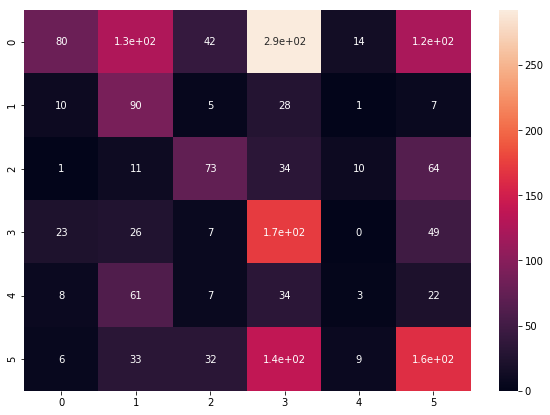

In [88]:
print("###############################################################")
y_pred = np.argmax(am.predict(Dtest),axis=1)
y_true = np.argmax(Y_test,axis=1)
cm = confusion_matrix(y_true,y_pred)
np.save("cm_video.npy",cm)
df = pd.DataFrame(cm)
plt.figure(figsize = (10,7),)
print("UNIMODAL VISUAL RESULTS")
print(classification_report(y_true,y_pred,target_names=target_names))
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)